# Decision Tree

Decision tree adalah model prediksi yang bersifat **supervised**, berarti memerlukan *training dataset* yang perannya menggantikan pengalaman manusia di masa lalu dalam membuat keputusan. *Training dataset* harus memiliki label, yaitu ke dalam kelompok mana setiap elemen data harus dimasukkan.

**Decision Tree** digunakan untuk membuat model prediksi *binary classification* (**ya** atau **tidak**) bisa juga digunakan untuk menentukan keluaran yang sifatnya *continuous* (angka 1, 2, 3, dan sebagainya). Metode yang dilakukan adalah dengan memecah data ke dalam kelompok yang lebih kecil berdasarkan atribut di dalam data. Pembagian kelompok ini dilakukan berulangkali hingga seluruh elemen data yang berasal dari kelas yang sama dapat masuk ke dalam satu kelompok. Hal ini sama dengan cara berpikir manusia secara umum, perbedaannya manusia memecah data berdasarkan pengalaman dan perasaan, sedangkan algoritma komputer memecah dengan mengukur **information gain**.

Karena relatif mudah diterapkan *decision tree* banyak digunakan sebagai metode pembuatan model prediksi untuk keperluan klasifikasi. Prosesnya juga dapat divisualkan layaknya pohon, sehingga *decision tree* memungkinkan kita mengatahui bagaimana proses prediksi terjadi di dalam model.

In [ ]:
pip install pydotplus

In [1]:
import pandas as pd
import sklearn.model_selection as ms
import sklearn.tree as tree
import sklearn.metrics as met
import pydotplus as pp
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

# Algoritma Decision Tree

### Algoritma Decision Tree Case 1

In [161]:
dataplay = pd.read_csv("/Users/Won/Library/CloudStorage/OneDrive-UGM365/play_tennis.csv", header=0)
dataplay

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### Membuat Decision Tree dengan Scikit-learn

Perlu diingat bahwa algoritma *Decision Tree* dapat menghasilkan model prediksi yang tidak akurat apabila kelas-kelas di dalam *training dataset* tidak seimbang jumlahnya. Apabila tidak seimbang, maka proses *balancing* (penyeimbang) harus dilakukan dengan cara membuang sebagian data (atau menambah data) dari salah satu kelas.

Dilakukan transformasi data terlebih dahulu untuk data kategorik berupa **encoding** ke angka 0 dan 1 agar scikit-learn bisa membacanya.

In [171]:
encoding0 = {'outlook': {'Rain':1,'Overcast':0,'Sunny':2}, 'temp':{'Hot':1,'Mild':2,'Cool':0}, 'humidity':{'Normal':1,'High':0}, 'wind':{'Weak':1,'Strong':0} }
dataplay.replace(encoding0, inplace=True)
dataplay

,outlook,temp,humidity,wind,play
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,2,0,1,Yes
4,1,0,1,1,Yes
5,1,0,1,0,No
6,0,0,1,0,Yes
7,2,2,0,1,No
8,2,0,1,1,Yes
9,1,2,1,1,Yes


In [215]:
X0 = dataplay.drop(['play'], axis=1)
y0 = dataplay['play']
X0_train, X0_test, y0_train, y0_test = ms.train_test_split(X0,y0, test_size = 0.25)

Pada dasarnya, algoritma di decision tree melakukan  *Splitting* data ke dalam dua kelompok berdasarkan atribut-atribut yang ada di dalam data, dengan mengukur suatu angka yang disebut **Entropy**. *Entropy* dapat diartikan sebagai ukuran seberapa acak suatu kelompok data.

*Entropy* yang semakin rendah menunjukkan bahwa kelompok data semakin homogen (berisi data yang sejenis, berasal dari kelas yang sama), nilai *entropy* nol berarti data sudah homogen sepenuhnya. Sementara, nilai *entropy* 1 berarti kelompok data berisi data acak 50-50.

Proses *splitting* dilakukan bertingkat dari atas ke bawah, menghasilkan kelompok data yang semakin kecil. Setiap kelompok data dibuat sedemikian rupa agar *entropy*-nya serendah mungkin;

In [216]:
model0 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
model0.fit(X0_train,y0_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [217]:
y0_prediksi = model0.predict(X0_test)
print(y0_prediksi)

['Yes' 'Yes' 'Yes' 'No']


In [218]:
print(met.accuracy_score(y0_test, y0_prediksi))

1.0


[Text(0.4444444444444444, 0.9, 'outlook <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]\nclass = yes'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = yes'),
 Text(0.5555555555555556, 0.7, 'humidity <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = no'),
 Text(0.3333333333333333, 0.5, 'outlook <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = no'),
 Text(0.2222222222222222, 0.3, 'wind <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = yes'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = no'),
 Text(0.7777777777777778, 0.5, 'temp <= 1.0\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = yes'),
 Text(0.6666666666666666, 0.3, 'wind <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = no'),

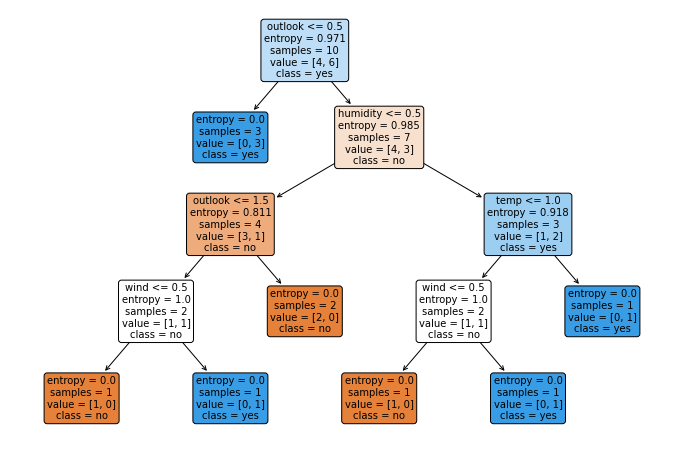

In [219]:
labels = ['outlook','temp','humidity','wind']

plt.figure(figsize=(12,8))
tree.plot_tree(model0,feature_names=labels, filled=True, rounded= True, fontsize=10,class_names=['no','yes'])

outlook
- 0 -> overcast
- 1 -> Rain
- 2 -> sunny

humidity
- 0 -> high
- 1 -> normal

wind
- 0 -> strong
- 1 -> weak

temp
- 0 -> cool
- 1 -> hot
- 2 -> mild

---
### Algoritma Decision Tree Case 2

Untuk memberikan gambaran kerja *decision tree*, misalkan kita hendak membuat model yang bisa mengklasifikasikan kendaraan bermotor, apakah termasuk kelompok sedan atau minibus berdasarkan ciri-ciri yang sudah disediakan. Untuk itu kita punya suatu *training dataset* sederhana berisi 20 buah kendaraan dengan tiga *feature* (jenis mesin, jumlah bangku dan jenis penggerak roda) seperti dibawah ini.

In [170]:
data = pd.read_csv("/Users/Won/Library/CloudStorage/OneDrive-UGM365/Self-course/Data Mining/intro to ML Book/ch6/klasifikasi jenis mobil.csv", header=0)
data

,ID,mesin,bangku,penggerak,label
0,1,bensin,4,depan,sedan
1,2,bensin,2,depan,sedan
2,3,bensin,8,belakang,minibus
3,4,diesel,6,depan,minibus
4,5,bensin,5,belakang,minibus
5,6,diesel,8,belakang,minibus
6,7,diesel,8,belakang,minibus
7,8,bensin,4,depan,sedan
8,9,diesel,7,belakang,minibus
9,10,bensin,4,depan,sedan


Dengan menggunakan data sederhana di atas, kita bisa melihat sekilas bahwa minibus kebanyakan bermesin diesel, berpenggerak roda belakang dan berbangku lebih dari empat. Di luar kriteria itu, kita menganggap kendaraan adalah sedan.

Pada dasarnya, algoritma di decision tree melakukan  *Splitting* data ke dalam dua kelompok berdasarkan atribut-atribut yang ada di dalam data, dengan mengukur suatu angka yang disebut **Entropy**. *Entropy* dapat diartikan sebagai ukuran seberapa acak suatu kelompok data.

*Entropy* yang semakin rendah menunjukkan bahwa kelompok data semakin homogen (berisi data yang sejenis, berasal dari kelas yang sama), nilai *entropy* nol berarti data sudah homogen sepenuhnya. Sementara, nilai *entropy* 1 berarti kelompok data berisi data acak 50-50.

Proses *splitting* dilakukan bertingkat dari atas ke bawah, menghasilkan kelompok data yang semakin kecil. Setiap kelompok data dibuat sedemikian rupa agar *entropy*-nya serendah mungkin; contoh di atas, sedan masuk ke dalam kelompok sedan, minibus ke dalam kelompok minibus.

In [125]:
encoding = {'mesin': {'bensin':0,'diesel':1}, 'penggerak':{'depan':0, 'belakang':1}}
data.replace(encoding, inplace=True)
data.head()

,ID,mesin,bangku,penggerak,label
0,1,0,4,0,sedan
1,2,0,2,0,sedan
2,3,0,8,1,minibus
3,4,1,6,0,minibus
4,5,0,5,1,minibus


### Membuat test dataset

In [137]:
X = data.drop(['ID','label'], axis=1)
y = data['label']
X_train, X_test, y_train, y_test = ms.train_test_split(X,y, test_size = 0.25)

Scikit-learn sudah mempersiapkan implementasi *Decision tree*, yaitu **DecisionTreeClassifier** yang ada di dalam modul sklearn.tree. Sebagai ujicoba pertama, kita akan melatih model dengan menggunakan entropy sebagai kriteria pengukuran proses *splitting*. Kita juga dapat menentukan jumlah maksimal kedalaman *tree*, dalam hal ini dibatasi 5 tingkat.

In [138]:
model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [139]:
y_prediksi = model.predict(X_test)
print(y_prediksi)

['sedan' 'minibus' 'minibus' 'sedan' 'sedan' 'sedan' 'sedan' 'sedan'
 'sedan' 'minibus']


In [140]:
print(met.accuracy_score(y_test, y_prediksi))

1.0


Akurasi model adalah 100% yang artinya sudah cukup baik dibandingkan dengan sekedar menebak sacara acak 50-50. Kriteria lain yang bisa digunakan dalam pengukuran selain *entropy* adalah **gini index**, yang menunjukkan proporsi suatu kelas data di dalam satu kelompok data. Ini mirip dengan *information gain*; bila *gini index* bernilai 0 maka artinya semua elemen data berasal dari kelas yang sama. *Gini index* sebenarnya juga dapat dianggap sebagai angka probabilitas yang nilainya dari nol hingga satu. Sedangkan, nilai maksimum *gini index* bergantung pada jumlah kelas yang ada dalam setiap kasus. Bila ada dua kelas (misalnya sedan dan minibus), maka *gini index* maksimalnya adalah 0.5 .

In [141]:
model1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5)
model1.fit(X_train, y_train)
y_prediksi = model1.predict(X_test)
print(y_prediksi)
print(met.accuracy_score(y_test,y_prediksi))

['sedan' 'minibus' 'minibus' 'sedan' 'sedan' 'sedan' 'sedan' 'sedan'
 'sedan' 'minibus']
1.0


In [142]:
print(metrics.classification_report(y_test,y_prediksi))

              precision    recall  f1-score   support

     minibus       1.00      1.00      1.00         3
       sedan       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Visualisasi

Salah satu keunggulan *Decision tree* adalah algoritma ini transparan dalam proses *training* sehingga memungkinkan kita mempelajari bagaimana *tree* dapat terbentuk.

[Text(0.6666666666666666, 0.875, 'bangku <= 4.5\nentropy = 0.918\nsamples = 30\nvalue = [20, 10]'),
 Text(0.5, 0.625, 'penggerak <= 0.5\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(0.3333333333333333, 0.375, 'bangku <= 3.0\nentropy = 0.65\nsamples = 12\nvalue = [2, 10]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.125, 'entropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]')]

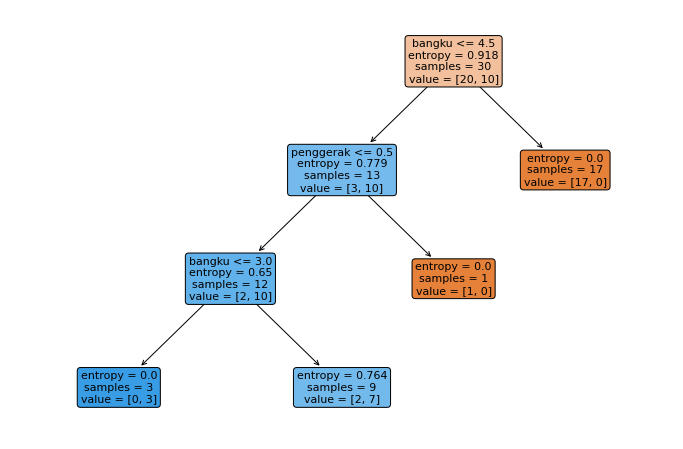

In [143]:
labels = ['mesin','bangku','penggerak']

plt.figure(figsize=(12,8))
tree.plot_tree(model,feature_names=labels, filled=True, rounded= True, fontsize=11)

Diagram diatas memberikan pemahaman yang lebih baik kepada kita, bagaimana algoritma *Decision tree* membangun model yang sudah kita latih. Informasi yang disajikan mencakup *features* yang diuji di setiap *node*, nilai *entropy*, jumlah data di *node* tersebut (*sample*) dan juga elemen data di setiap kelas data (misalnya [18,14] di *root node* artinya ada 18 sedan dan 14 minibus).

Terlihat bahwa di *root node*, *feature* yang dipilih oleh algoritma untuk diuji adalah jumlah bangku apakah di bawah 5. Proses *splitting* pertama menghasilkan kelompok *true* di kiri berisi 16 *sample*, kelompok *false* berisi 16 *sample*. Di tingkat bawahnya, proses *splitting* diulang lagi, dan *feature* yang dipilih adalah tipe mesin. Demikian seterusnya sehingga *leaf node* terapai.

[Text(0.6666666666666666, 0.875, 'bangku <= 4.5\ngini = 0.444\nsamples = 30\nvalue = [20, 10]'),
 Text(0.5, 0.625, 'penggerak <= 0.5\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.3333333333333333, 0.375, 'bangku <= 3.0\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]')]

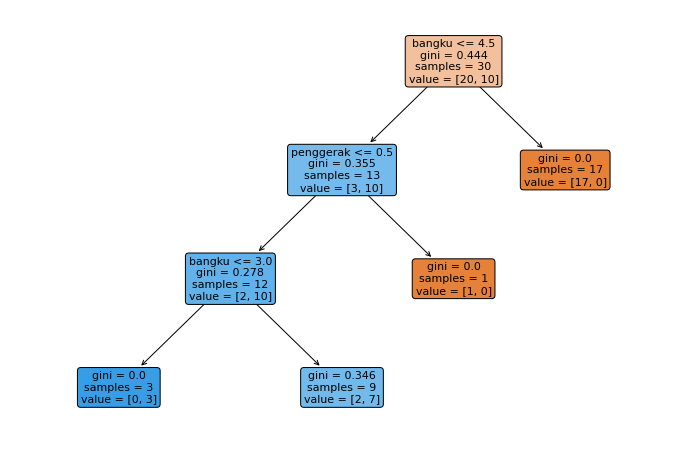

In [144]:
labels = ['mesin','bangku','penggerak']
plt.figure(figsize=(12,8))
tree.plot_tree(model1,feature_names=labels, filled=True, rounded= True, fontsize=11)

# Decision Trees untuk membuat regression model

Selain untuk keperluan klasifikasi seperti contoh di atas, algoritma *Decision tree* juga dapat dimanfaatkan untuk membuat model *Regression trees*, yang berguna memprediksi target dengan sifat kategorikal, misalnya 'tinggi', 'sedang', dan sebagainya.

Prinsipnya sama dengan model klasifikasi, adapun proses *splitting* menjadi sedikit kompleks karena metrik evaluasinya berbeda. Scikit-learn sudah mempersiapkan paket **DecisionTreeRegressor** untuk keperluan ini

In [84]:
data1 = pd.read_csv("/Users/Won/Library/CloudStorage/OneDrive-UGM365/Self-course/Data Mining/intro to ML Book/ch6/klasifikasi jenis mobil.csv", header=0)
encoding1 = {'mesin': {'bensin':0,'diesel':1}, 'penggerak':{'depan':0, 'belakang':1},'label':{'sedan':0, 'minibus':1}}
data1.replace(encoding1, inplace=True)
X = data1.drop(['ID','label'], axis=1)
y = data1['label']
X_train, X_test, y_train, y_test = ms.train_test_split(X,y, test_size = 0.25)

In [85]:
model2 = tree.DecisionTreeRegressor(criterion='mse', max_depth=5)
model2.fit(X_train, y_train)
y_prediksi = model2.predict(X_test)
print(y_prediksi)
#print(met.accuracy_score(y_test,y_prediksi))

[0.11111111 1.         1.         0.11111111 1.         0.11111111
 0.11111111 0.11111111 0.11111111 1.        ]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


[Text(0.6666666666666666, 0.875, 'bangku <= 4.5\nmse = 0.24\nsamples = 30\nvalue = 0.6'),
 Text(0.5, 0.625, 'penggerak <= 0.5\nmse = 0.122\nsamples = 14\nvalue = 0.143'),
 Text(0.3333333333333333, 0.375, 'bangku <= 3.0\nmse = 0.071\nsamples = 13\nvalue = 0.077'),
 Text(0.16666666666666666, 0.125, 'mse = 0.0\nsamples = 4\nvalue = 0.0'),
 Text(0.5, 0.125, 'mse = 0.099\nsamples = 9\nvalue = 0.111'),
 Text(0.6666666666666666, 0.375, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.8333333333333334, 0.625, 'mse = 0.0\nsamples = 16\nvalue = 1.0')]

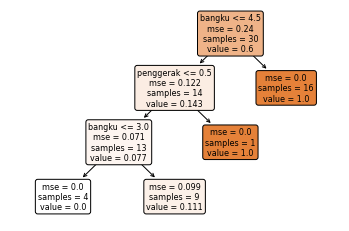

In [86]:
labels = ['mesin','bangku','penggerak']
tree.plot_tree(model2,feature_names=labels, filled=True, rounded= True, fontsize=8)

# Pengembangan Decision Trees

Dalam contoh sedan dan minibus di atas kita hanya menggunakan tiga *feature* sederhana sehingga proses pembuatan *Decision tree* menjadi mudah. Jika kita memiliki banyak *feature* maka terlebih dahulu dilakukan profiling, yaitu membuang variabel yang tidak relevan dengan melihat korelasi antar variabel.

## Random Forest

Metode ini memungkinkan kita menggabungkan beberapa model untuk mendapatkan hasil yang lebih baik daripada menjalankan setiap model sendiri-sendiri. Untuk mengatasi kelemahan *decision tree*, metode RF banyak dimanfaatkan untuk mencapai hasil akurasi yang lebih baik. Prinsipnya adalah membangun beberapa model *decision tree* dan kemudian mengabungkan hasilnya.

Karena *Decision Tree* seringkali dimanfaatkan untuk membangun *classification model*, fungsi penggabungan ini berupa mekanisme **voting** (penentuan suara terbanyak) yang menjadi penentu keluaran mana yang akan dipakai. Setiap *tree* akan memberikan hak suaranya, dan kelas yang paling populer akan dimenangkan sebagai hasil akhir. Dalam RF, mekanisme *voting* dilaksanakan dengan memanfaatkan *test dataset* ketika proses validasi terjadi.

Scikit-learn menyediakan modul **sklearn.ensemble** yang di dalamnya terdapat **RandomForestClassifier** untuk keperluan membuat RF.

In [87]:
import sklearn.ensemble as ens

In [88]:
rf = ens.RandomForestClassifier(n_estimators=100)

In [89]:
data2 =  pd.read_csv("/Users/Won/Library/CloudStorage/OneDrive-UGM365/Self-course/Data Mining/intro to ML Book/ch6/klasifikasi jenis mobil.csv", header=0)
encoding2 = {'mesin': {'bensin':0,'diesel':1}, 'penggerak':{'depan':0, 'belakang':1}}
data2.replace(encoding2, inplace=True)
X = data2.drop(['ID','label'],axis=1)
y = data2['label']
X_train, X_test, y_train, y_test = ms.train_test_split(X,y, test_size = 0.25)
ms.train_test_split(X,y,test_size=0.2)
rf.fit(X_train, y_train)
print(rf)

RandomForestClassifier()


In [90]:
y_prediksi = rf.predict(X_test)
met.accuracy_score(y_test,y_prediksi)

0.9

In [91]:
score = rf.feature_importances_
print(score)

[0.2084705  0.47618087 0.31534864]


## Random Forest Dataset yang lebih besar

In [94]:
rf = ens.RandomForestClassifier(n_estimators=100)
df = pd.read_csv("/Users/Won/Library/CloudStorage/OneDrive-UGM365/Self-course/Data Mining/intro to ML Book/ch6/bab6_adult_data.csv", header=0)
df.dropna(inplace=True)
df.head(10)

,age,workclass,fnlwft,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [95]:
import sklearn.preprocessing as prep
gender = prep.LabelEncoder()
gender.fit(df['sex'])
df['sex_code'] = gender.transform(df['sex'])
df.head()

,age,workclass,fnlwft,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income,sex_code
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [96]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
df_categorical = df.select_dtypes(exclude=np.number).columns
df_label_encoder = LabelEncoder()
for i in df_categorical :
    df[i] = df_label_encoder.fit_transform(df[i])
print('Label Encoded Data')
df.head()

Label Encoded Data


,age,workclass,fnlwft,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income,sex_code
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0,1
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0,1
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0,1
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0,1
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0,0


In [97]:
df = df.drop(['sex_code'],axis=1)
df.head()

,age,workclass,fnlwft,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [98]:
X = df
y = df['income']

In [99]:
X_train, X_test, y_train, y_test = (ms.train_test_split(X,y,test_size=0.2))

In [100]:
rf.fit(X_train,y_train)
y_prediksi = rf.predict(X_test)
print('akurasi= ', met.accuracy_score(y_test, y_prediksi))
print(met.classification_report(y_test, y_prediksi))
print(rf.feature_importances_)

akurasi=  0.9998976353772137
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4905
           1       1.00      1.00      1.00      2483
           2       1.00      1.00      1.00      1586
           3       1.00      1.00      1.00       795

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769

[0.02016902 0.00445743 0.01338841 0.00635443 0.02077102 0.02126618
 0.00733407 0.02642716 0.00206394 0.00308603 0.02440007 0.00553982
 0.01105572 0.00247087 0.83121584]


[Text(0.32018369593469875, 0.9852941176470589, 'income <= 0.5\ngini = 0.646\nsamples = 24744\nvalue = [19842, 9914, 6326, 2991]'),
 Text(0.3190804378757434, 0.9558823529411765, 'gini = 0.0\nsamples = 12601\nvalue = [19842, 0, 0, 0]'),
 Text(0.3212869539936541, 0.9558823529411765, 'age <= 28.5\ngini = 0.602\nsamples = 12143\nvalue = [0, 9914, 6326, 2991]'),
 Text(0.07950865152559904, 0.9264705882352942, 'marital_status <= 2.5\ngini = 0.21\nsamples = 2365\nvalue = [0, 3313, 316, 117]'),
 Text(0.029304753490777453, 0.8970588235294118, 'education_num <= 10.5\ngini = 0.519\nsamples = 566\nvalue = [0, 574, 247, 89]'),
 Text(0.01779003620065506, 0.8676470588235294, 'capital_gain <= 5095.5\ngini = 0.429\nsamples = 390\nvalue = [0, 461, 127, 48]'),
 Text(0.009101878986381658, 0.8382352941176471, 'workclass <= 0.5\ngini = 0.399\nsamples = 375\nvalue = [0, 461, 110, 43]'),
 Text(0.002206516117910705, 0.8088235294117647, 'marital_status <= 1.5\ngini = 0.116\nsamples = 17\nvalue = [0, 31, 1, 1]'),


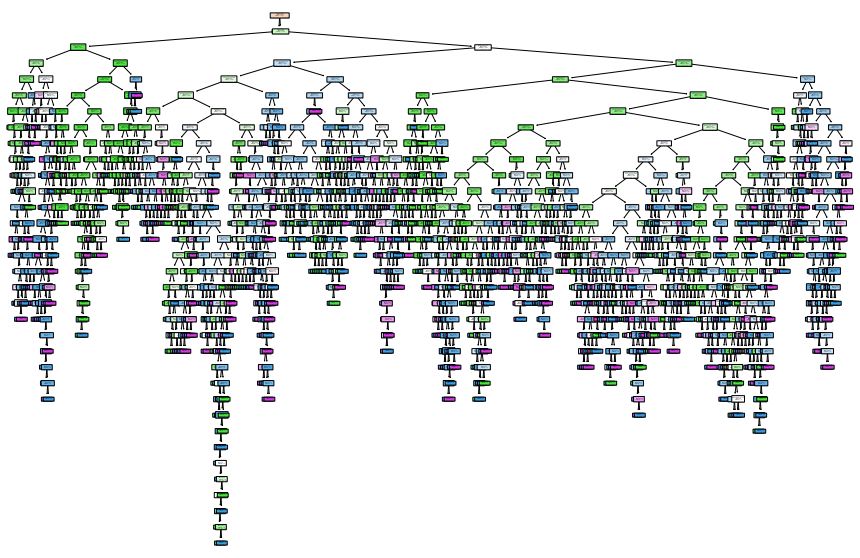

In [101]:
#from sklearn.tree import export_graphviz

# Train
rf.fit(X_train,y_train)
# Extract single tree
estimator = rf.estimators_[5]

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[5], feature_names=df.columns, filled=True, impurity=True, rounded=True)

Keunggulan utama *Decision tree* adalah implementasinya yang tidak sulit. Juga karena prosesnya transparan, hasil model mudah dijelaskan secara visual sehingga hasil analisis data mudah dijelaskan kepada pihak lain, misalnya klien bisnis. Secara umum, *Decision tree* adalah algoritma yang biasanya dicoba pertama kali sebelum mencoba strategi *Machine Learning* lainnya bilamana hasilnya kurang memuaskan.

Metode RF diciptakan untuk membangun model yang lebih kokoh dengan memanfaatkan banyak model *Decision Tree*. Metode semacam ini disebut juga dengan istilah **Bagging** (*Bootsrap aggregation*). RF lebih efektif mengatasi masalah *overfitting*, karena ada banyak hasil prediksi yang bisa diambil dan menghasilkan bias yang mungkin ada.

Adapun begitu karena banyak model yang harus dibangun, biaya komputasi RF akan berkali lipat lebih tinggi dan memerlukan waktu lebih lama. Selain itu RF juga menghilangkan transparansi proses, tidak seperti *Decision tree* di mana keputusan di setiap cabang bisa divisualisasikan dengan jelas.